In [1]:
# importing the required libraries
import numpy as np
import pandas as pd

The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

*We have readed the data with the help of read_csv function and stored it into a new dataframe named covid_df so that it can be further processed and accessed. Then we have checked for missing value and incorrect value by using the .isna, min(), max() methods.*

*Atlast we have added some of the required columns in the dataframe by performing some of the mathematical calculations.*



In [2]:
# Loading the dataset into a data frame using Pandas
df = pd.read_csv('dataframe.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [3]:
# Exploring the number of rows & columns
df.shape

(1697, 2)

In [4]:
df.sample(10)

,input,output
835,-120.366669,-90.000000
1502,57.812715,-5.251918
633,9.251403,-97.297533
66,-103.366669,-52.000000
165,-50.375608,-40.552068
444,104.633331,71.000000
43,-120.275093,-78.087838
1325,4.633331,-77.000000
703,-26.366669,-57.000000
1055,98.209265,111.476958


In [5]:
# Handle missing, incorrect and invalid data
df[['input','output']].min()

input    -134.962839
output   -132.422167
dtype: float64

In [6]:
df[['input','output']].max()

input     134.605775
output    134.425495
dtype: float64

In [7]:
# All the values are present in the required columns
from IPython.display import display
with pd.option_context('display.max_rows', 200):
    display(df.isna())

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


In [8]:
# Performing additional steps (creating additional columns)
df['Difference'] = df.output - df.input
df

,input,output,Difference
0,-122.740667,-130.572085,-7.831417
1,-121.531419,-129.938929,-8.407510
2,-134.917019,-130.141832,4.775187
3,-120.605951,-125.760932,-5.154981
4,-129.894781,-112.785214,17.109567
...,...,...,...
1692,25.410184,-76.380902,-101.791086
1693,29.537304,-82.796934,-112.334238
1694,31.633331,-87.000000,-118.633331
1695,29.091458,-104.943052,-134.034510


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Computing the mean, sum, range and other interesting statistics for Dataset columns**

In [10]:
# Computing the mean, sum, range and other interesting statistics for numeric columns
df.describe()

,input,output,Difference
count,1696.000000,1696.000000,1696.000000
mean,1.159933,-34.088017,-35.247950
std,79.005970,65.771112,72.450615
min,-134.962839,-132.422167,-149.940045
25%,-63.386506,-80.026767,-93.153618
50%,10.195194,-50.470981,-47.151204
75%,70.264109,-11.000000,13.477305
max,134.605775,134.425495,256.366669


**Here we have drawn a scatter plot which tells us the insights of *input* v/s the *output* of the given data**

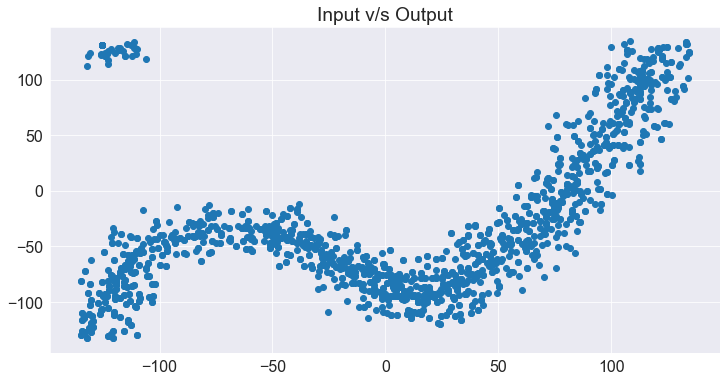

In [11]:
plt.title('Input v/s Output')
plt.scatter(df.input,df.output);

In [12]:
df_new = df[np.isfinite(df).all(1)]
X = df_new.iloc[:, :-1].values  
y = df_new.iloc[:, 1].values
print(X.shape)
print(y.shape)

(1696, 2)
(1696,)


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [14]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [15]:
y_pred = model.predict(X_test) # Predicting the scores

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,37.274268,37.274268
1,-126.267621,-126.267621
2,-23.929979,-23.929979
3,-80.044801,-80.044801
4,-93.000000,-93.000000
...,...,...
335,20.760415,20.760415
336,-41.625461,-41.625460
337,-60.000000,-60.000000
338,-114.403385,-114.403384
